# Three-cornered-hat test
See http://www.wriley.com/3-CornHat.htm

we test ADEV etc. by calculations on synthetic data
with known slopes of ADEV

#### Import packages and setup notebook

In [5]:
%matplotlib inline

In [6]:
import numpy
import matplotlib.pyplot as plt 
import allantools
from allantools import noise

In [7]:
def plotallan_phase(plt,y,rate,taus, style):
	(t2, ad, ade,adn) = allantools.mdev(y,rate=rate,taus=taus)
	plt.loglog(t2, ad, style)

# plot a line with the slope alpha
def plotline(plt, alpha, taus,style):
	y = [ pow(tt,alpha) for tt in taus]
	plt.loglog(taus,y,style)

Generate some example data

In [8]:
t = numpy.logspace( 0 ,4,50) # tau values from 1 to 1000

N=10000
rate = 1.0
# white phase noise => 1/tau ADEV
d = numpy.random.randn(4*N)
phaseA = d[0:N] # numpy.random.randn(N) #pink(N)
phaseA = [1*x for x in phaseA]
phaseB = d[N:2*N] #numpy.random.randn(N) #noise.pink(N)
phaseB = [5*x for x in phaseB]
phaseC = d[2*N:3*N] #numpy.random.randn(N) #noise.pink(N)
phaseC = [5*x for x in phaseC]

phaseAB = [a-b for (a,b) in zip(phaseA,phaseB)]
phaseBC = [b-c for (b,c) in zip(phaseB,phaseC)]
phaseCA = [c-a for (c,a) in zip(phaseC,phaseA)]


Now, run three-cornered hat phase calculation

In [11]:
(taus,devA) = allantools.three_cornered_hat_phase(phaseAB,phaseBC,phaseCA,rate,t, allantools.mdev)

Plot results:

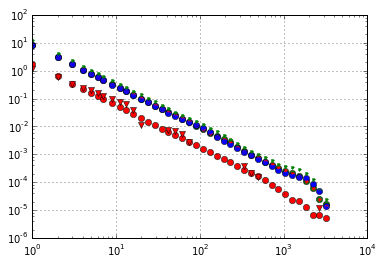

In [12]:
plt.subplot(111, xscale="log", yscale="log")
plotallan_phase(plt, phaseA, 1, t, 'ro')
plotallan_phase(plt, phaseB, 1, t, 'go')
plotallan_phase(plt, phaseC, 1, t, 'bo')

plotallan_phase(plt, phaseAB, 1, t, 'r.')    
plotallan_phase(plt, phaseBC, 1, t, 'g.')
plotallan_phase(plt, phaseCA, 1, t, 'b.')    

plt.loglog(taus, devA, 'rv')

plt.grid()
plt.show()